# Ammonyte: Laplacian eigenmaps workflow

By: Alexander James

Last updated: Jan 2nd 2023

### Purpose:

The purpose of this notebook is to introduce the workflow for applying the Laplacian eigenmaps Recurrence Quantification Analysis (RQA) technique to time series data. This workflow was originally described by [Malik 2020](https://pubmed.ncbi.nlm.nih.gov/32872795/).

### Summary of the method

The basic idea behind the Laplacian eigenmaps method is to detect when changes in the dynamical regime of the system attractor that generated a time series occur. This is done by calculating the recurrence matrix, which contains information on when attractor dynamics change, and using a combination of the graph Laplacian and Fisher information statistic to produce a single statistic that quantifies changes in the recurrence matrix. For a more in depth description, please see [this paper](https://pubmed.ncbi.nlm.nih.gov/32872795/).

In [1]:
#Importing relevant packages

import ammonyte as amt
import pandas as pd

We'll use the nino data in this tutorial.

In [2]:
nino_df = pd.read_csv('../example_data/wtc_test_data_nino_even.csv')

In [3]:
nino_df

,t,air,nino
0,1871.000000,87.36090,-0.358250
1,1871.083333,-21.83460,-0.292458
2,1871.166667,-5.52632,-0.143583
3,1871.250000,75.73680,-0.149625
4,1871.333333,105.82000,-0.274250
...,...,...,...
1591,2003.583333,-206.03800,0.238497
1592,2003.666667,103.90200,0.411449
1593,2003.750000,218.24100,0.592756
1594,2003.833333,-154.66200,0.664131


If what we're doing here doesn't make sense to you, check out the `Introduction` notebook in the notebooks folder!

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='Year', ylabel='Nino Index'>)

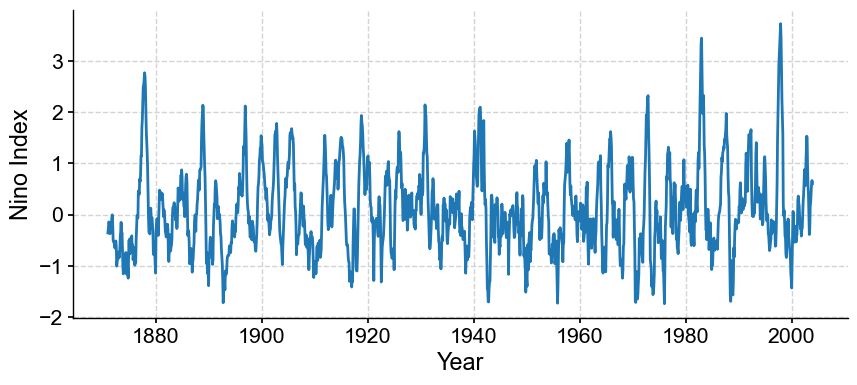

In [4]:
nino_series = amt.Series(time=nino_df['t'].values,
                        value=nino_df['nino'].values,
                        value_name='Nino Index',
                        time_name = 'Year',)

nino_series.plot()

Creating our recurrence matrix as before:

In [5]:
m = 15

nino_td = amt.TimeEmbeddedSeries(nino_series,m)

nino_td.tau

11

In [6]:
nino_eps = nino_td.find_epsilon(eps=1,target_density=.05,tolerance=.01,amp=30)

Initial density is 0.0013
Initial density is not within the tolerance window, searching...
Epsilon: 2.4607, Density: 0.0113.
Epsilon: 2.9250, Density: 0.0410.
Epsilon: 2.9250, Density: 0.0410.


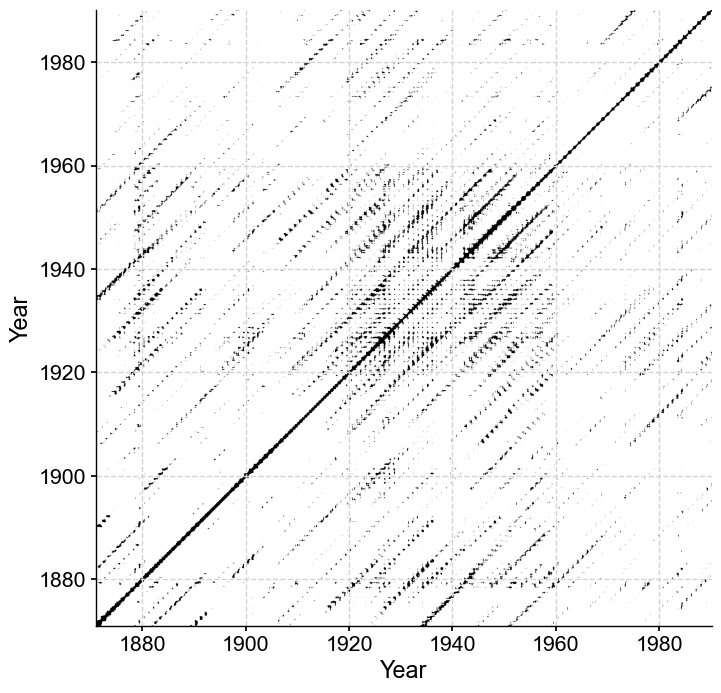

In [7]:
nino_rm = nino_eps['Output']

nino_rm.plot()

The calculation of the graph Laplacian and Fisher information statistic are done with a single method call on your recurrence plot.

In [8]:
nino_lp = nino_rm.laplacian_eigenmaps(w_size=50,w_incre=10)

Currently the main plotting method is the fill plot. This method is in keeping with the method described in [Malik 2020](https://pubmed.ncbi.nlm.nih.gov/32872795/). Note that a confidence interval is calculated

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot: xlabel='Year [None]', ylabel='Nino Index [None]'>)

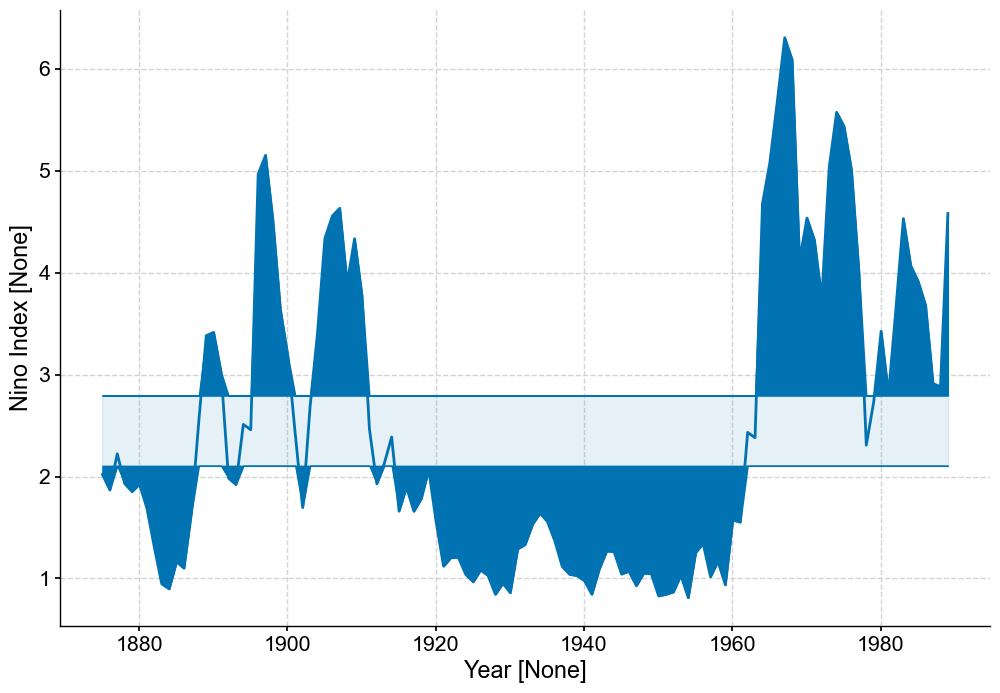

In [9]:
nino_lp.confidence_fill_plot()